# Using Housing Prices Dataset from Kaggle

## Objective : 
Develop a linear regression model to predict house price based on features such as the number of rooms, location, size and other relevant factors. Collect a suitable dataset from Kaggle, preprocess it, and train the model to make accurate predictions.



#### Loading CSV

In [2]:
import pandas as pd

df = pd.read_csv("Housing.csv")
df.head()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


#### Viewing data details 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [4]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [5]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

#### Preprocessing the data 

In [6]:
#Handling Missing Values
df = df.dropna()


In [7]:
df_proc = pd.get_dummies(df, drop_first=True)

#### Feature Selection and Target variable 

In [9]:
X = df_proc.drop('price', axis=1)
y = df_proc['price']  

#### Splitting Data 

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#### Model Training 

In [11]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

#### Model Based Predictions

In [12]:
y_pred = model.predict(X_test)

#### Model evaluation using MSE and R^2

In [13]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared Score:", r2)


Mean Squared Error: 1754318687330.6643
R-squared Score: 0.6529242642153184


#### Predicting on Custom Input 

In [17]:
import pandas as pd


expected_columns = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking',
                    'mainroad_yes', 'guestroom_yes', 'basement_yes',
                    'hotwaterheating_yes', 'airconditioning_yes',
                    'prefarea_yes', 'furnishingstatus_semi-furnished',
                    'furnishingstatus_unfurnished']

custom_input = pd.DataFrame([[
    2000,    
    3, 
    2,      
    2,       
    1,      
    1,       
    0,      
    1,       
    0,      
    1,       
    1,      
    0,      
    0       
]], columns=expected_columns)


predicted_price = model.predict(custom_input)
print("Predicted House Price:", predicted_price[0])



Predicted House Price: 6370479.172058193


#### Visualizing using Matplotlib Scatter

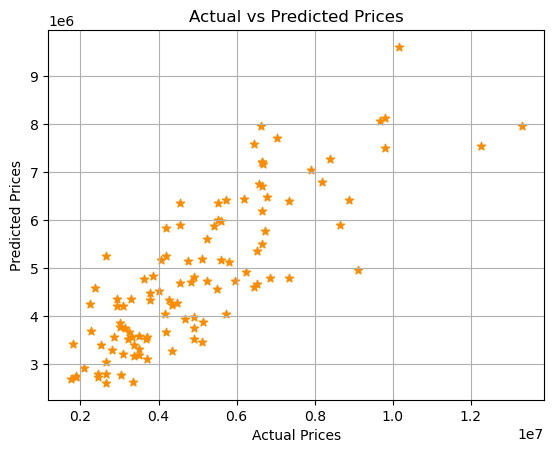

In [14]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred, marker='*', color='darkorange')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")
plt.grid(True)
plt.show()
